In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
path = os.getcwd() + '\Data\House_Price_Training_Data.csv'
org_data = pd.read_csv(path)
org_data.head()

,Size,Price
0,502.69,6.3
1,503.65,6.3
2,505.46,6.5
3,505.94,6.5
4,507.02,6.6


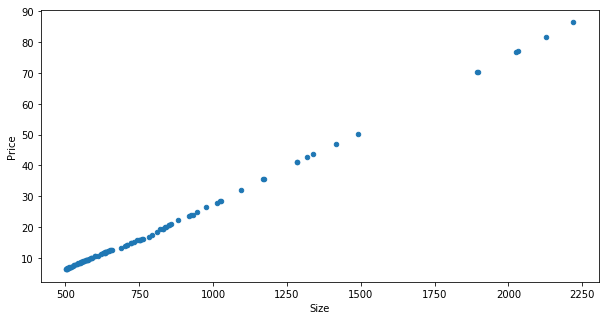

In [3]:
org_data.plot(kind='scatter', x='Size', y='Price', figsize=(10,5) )

In [4]:
data = (org_data - org_data.mean())/(org_data.max() - org_data.min())
data.head()

,Size,Price
0,-0.182399,-0.169891
1,-0.181840,-0.169891
2,-0.180786,-0.167394
3,-0.180507,-0.167394
4,-0.179878,-0.166145


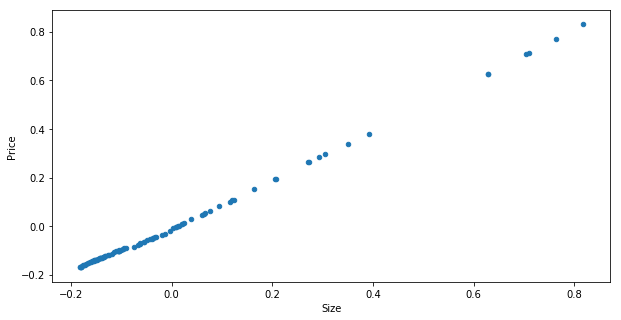

In [5]:
data.plot(kind='scatter', x='Size', y='Price', figsize=(10,5) )

In [6]:
data.shape

(97, 2)

In [7]:
data.insert (0, 'Ones', 1)
data.head()

,Ones,Size,Price
0,1,-0.182399,-0.169891
1,1,-0.181840,-0.169891
2,1,-0.180786,-0.167394
3,1,-0.180507,-0.167394
4,1,-0.179878,-0.166145


In [8]:
cols = data.shape[1]
print (cols)

3


In [9]:
x = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [10]:
x = np.matrix(x)
y = np.matrix(y)
theta = np.matrix(np.array([0,0]))

In [11]:
x.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [12]:
def computeError(x, y, theta):
    inner = np.power(((x*theta.T)-y), 2)
    return np.sum(inner)/(2*len(x))

In [13]:
computeError(x, y, theta)

0.024346853685025278

In [14]:
Learn_rate=1
iters=150
def gradientDescent(x,y,theta,Learn_Rate,iters):
    temp=np.matrix(np.zeros(theta.shape))
    parameters=int(theta.ravel().shape[1])
    cost=np.zeros(iters)
    
    for i in range(iters):
        error=(x*theta.T)-y
        
        for j in range(parameters):
            term=np.multiply(error,x[:,j])
            temp[0,j]=theta[0,j]-((Learn_rate/len(x))*np.sum(term))
            
        theta=temp
        cost[i]=computeError(x,y,theta)
        
    return theta,cost

In [15]:
g,cost=gradientDescent(x,y,theta,Learn_rate,iters)
print(g,cost)

[[ -1.02116196e-16   9.82955251e-01]] [  2.19673183e-02   1.98208708e-02   1.78846789e-02   1.61381471e-02
   1.45626971e-02   1.31415706e-02   1.18596508e-02   1.07033016e-02
   9.66022291e-03   8.71931915e-03   7.87058178e-03   7.10498263e-03
   6.41437789e-03   5.79142147e-03   5.22948685e-03   4.72259664e-03
   4.26535895e-03   3.85291006e-03   3.48086268e-03   3.14525926e-03
   2.84252994e-03   2.56945453e-03   2.32312827e-03   2.10093094e-03
   1.90049899e-03   1.71970039e-03   1.55661194e-03   1.40949886e-03
   1.27679627e-03   1.15709258e-03   1.04911449e-03   9.51713408e-04
   8.63853270e-04   7.84599488e-04   7.13109024e-04   6.48621422e-04
   5.90450714e-04   5.37978129e-04   4.90645505e-04   4.47949357e-04
   4.09435518e-04   3.74694309e-04   3.43356182e-04   3.15087786e-04
   2.89588427e-04   2.66586861e-04   2.45838419e-04   2.27122393e-04
   2.10239700e-04   1.95010753e-04   1.81273561e-04   1.68881998e-04
   1.57704253e-04   1.47621426e-04   1.38526264e-04   1.30322020e

In [16]:
x=data.Size

In [17]:
f=g[0,0]+(g[0,1]*x)

Text(0.5,1,'Predicted Price vs. Size')

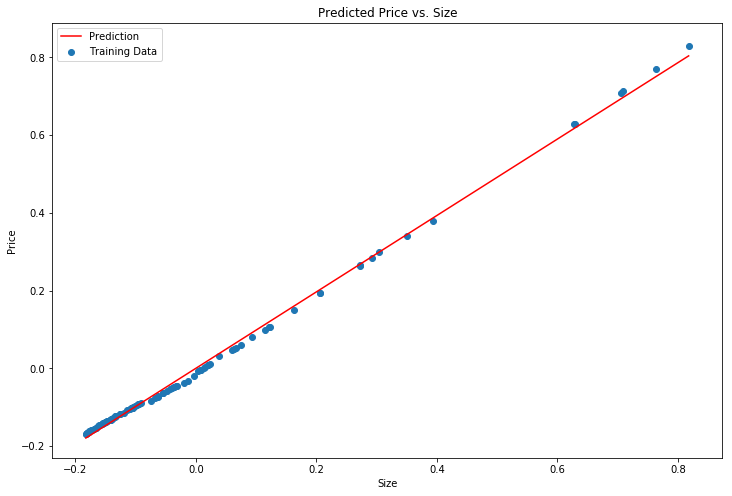

In [18]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(x,f,'r',label='Prediction')
ax.scatter(data.Size,data.Price,label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Predicted Price vs. Size')

Text(0.5,1,'Error vs. Iterations')

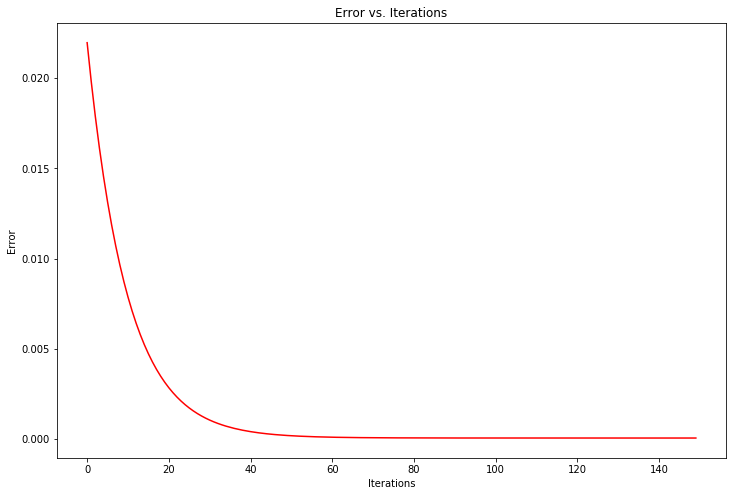

In [19]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Error')
ax.set_title('Error vs. Iterations')

In [20]:
from sklearn.metrics import r2_score
acc=(r2_score(y,f))
print("Accuracy = {}%".format(acc*100))

Accuracy = 99.77501872943576%


In [21]:
def predict(theta,acc):
    #get input from user
    size=float(input("Enter the size of the house: "))
    #mean normalization
    size=(size-org_data.Size.mean())/(org_data.Size.max()-org_data.Size.min())
    #model
    price=(theta[0,0]+(theta[0,1]*size))
    #reversing mean normalization
    new_price=(price*(org_data.Price.max()-org_data.Price.min())+(org_data.Price.mean()))
    
    price_at_max_acc=(new_price*(1/acc))
    price_range=price_at_max_acc-new_price
    
    return new_price, price_range

In [25]:
New_price,price_range=predict(g,acc)
print("The cost of your house will be "+str(New_price)+' Lakhs'+' (+ or -) '+str(price_range)+' Lakhs')

Enter the size of the house: 2000
The cost of your house will be 74.1833610601 Lakhs (+ or -) 0.167275005694 Lakhs
